# Module 1. OpenCV 套件
### 概要 :
> * OpenCV 全名是 Open Source Computer Vision ( Library )
> * 白 / 黑盒子 : 介面, 參數, 傳回值
> * 演算法 : 需了解基本原理, 對運用極有幫助, 非探究數學推倒
> * 應  用 : 需掌握正確使用方法
> * Q&A 社團 iCoding : https://www.facebook.com/groups/216955676502460
---

## 1-1: OpenCV 環境安裝
### ``NOT suggest to use Conda or VS code``
> * 在 (命令提示字元 / Windows PowerShel ``系統管理員``) 身分下打 pip install jupyterlab 指令( ``灌程式`` )
> * 在 (命令提示字元 / Windows PowerShell ``一般身分``)下打 jupyter lab ( ``執行程式`` )(shell> jupyter lab)

## Anaconda : 建立 python 3.6.x 虛擬環境
> * or install Anaconda ( :>jupyter notebook) (暫不建議, 為了維持一套 python 在電腦中)
> * conda create --name py36x python=3.6.8 --channel conda-forge<br>
> * 回到 conda Home 將 JupyterLab install & Launch<br>
> [``conda install -c conda-forge jupyterlab``]

### install following in command line :
> * install python ``3.6.8``
> * ``pip install jupyterlab ( 上面 conda install -c conda-forge jupyterlab 已經跑過，就不要再跑了 )``
> * pip install opencv-python
> * pip install opencv-contrib-python
> * pip install matplotlib
> * pip install scikit-image
> * pip install imutils
> * pip install dlib==``19.8.1`` <br>
> ( or dlib-19.8.1-cp36-cp36m-win_amd64.whl ) (``python 3.6.8``)

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python
!pip install matplotlib
!pip install scikit-image
!pip install imutils
!pip install dlib==19.8.1
#( or dlib-19.8.1-cp36-cp36m-win_amd64.whl ) (python 3.6.8)

     |████████████████████████████████| 66.5 MB 67 kB/s             �▏                          | 10.6 MB 149 kB/s eta 0:06:15
     |████████████████████████████████| 10.3 MB 5.4 MB/s            
     |████████████████████████████████| 1.6 MB 4.5 MB/s            
     |████████████████████████████████| 3.1 MB 4.2 MB/s            
     |████████████████████████████████| 34.6 MB 103 kB/s             
     |████████████████████████████████| 175 kB 821 kB/s            
     |████████████████████████████████| 28.5 MB 189 kB/s            
     |████████████████████████████████| 1.9 MB 4.9 MB/s            
     |█▌                              | 204 kB 5.9 MB/s eta 0:00:01

### Jupyter 快捷鍵
> * shift-enter: 跑程式
> * A : 上面增加一格
> * B : 下面增加一格
> * C : 複製 (crtl + C)
> * V : 貼上 (crtl + V)
> * Z : 復原 (crtl + Z)
> * X : 剪下 (crtl + X)
> * shift-up & shift-down: 多個 block 選取
> * M : markdown 抄筆記
> * shift + tab : param instruction
> * tab : functions instruction

In [1]:
import cv2
import numpy as np
import dlib
import sys
import matplotlib
from matplotlib import pyplot as plt

print(f'python ver.\t: {sys.version}\n'
      f'cv2 ver.\t: {cv2.__version__}\n'
      f'numpy ver.\t: {np.__version__}\n'
      f'matplotlib ver.\t: {matplotlib.__version__}\n'
      f'dlib ver.\t: {dlib.__version__}')

ModuleNotFoundError: No module named 'cv2'

---

## 1-2: 彩色、灰階照片讀取/寫入

### Read / Open image file : ``B:0, G:1, R:2``
><img src=".\image\rgb01.png"  style='height:250px; width:520px'>
><img src=".\image\image2vector.png"  style='height:250px; width:520px'>

> 讀取支援的格式：bmp, pbm, pgm, ppm, jpeg, jpg, tiff, tif, png ....<br>
> https://docs.opencv.org/master/d4/da8/group__imgcodecs.html

### RGB to Gray ?
* 加權平均法 : 根據重要性及其它指標，將三個分量以不同的權值進行加權平均。由於人眼對綠色的敏感最高，對藍色敏感最低，因此，按下式對RGB三分量進行加權平均能得到較合理的灰度影像。
> $F(i, j) = 0.299 R(i, j) + 0.587 G(i, j) + 0.114 B(i, j)$

* 分量法 : 將彩色影像中的三分量的亮度作為三個灰度影像的灰度值，可根據應用需要選取一種灰度影像。
> $F1(i, j) = R(i, j)$<br>
> $F2(i, j) = G(i, j)$<br>
> $F3(i, j) = B(i, j)$

* 最大值法 : 將彩色影像中的三分量亮度的最大值作為灰度圖的灰度值。
> $F(i, j) = max(R(i, j), G(i, j), B(i, j))$

* 平均值法 : 將彩色影像中的三分量亮度求平均得到一個灰度值。
> $F(i, j) = (R(i, j) + G(i, j) + B(i, j)) / 3$

### Gray to RGB : R ← Gray, G ← Gray, B ← Gray<br>
https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html

### read image file 
| 數值 |      含意      |           語法         |
|:----:|:-------------:|:--------------------:|
|  -1  | 保持原格式不便 | cv2.IMREAD_UNCHANGED |
|  0   |  單通道灰階    | cv2.IMREAD_GRAYSCALE | 
|  1   | 3通道BGR (**預設**) |   cv2.IMREAD_COLOR   | 

In [2]:
import cv2
from matplotlib import pyplot as plt

img0 = cv2.imread('./image/SpongeBob.jpg', 0)    # 0 灰階
# img0 = cv2.imread('./image/SpongeBob.jpg', cv2.IMREAD_GRAYSCALE)  # same

img1 = cv2.imread('./image/SpongeBob.jpg', 1)    # 1 BGR,  1 可省略(原圖)

cv2.imshow('SpongeBob Gray', img0)
cv2.waitKey(0)
cv2.imshow('SpongBob Color', img1)

cv2.waitKey(0)                                 # 0 wait for anykey任意按鍵, try 3000
cv2.destroyAllWindows()
cv2.waitKey(1)

ModuleNotFoundError: No module named 'cv2'

### image from numpy point of view

#### Data Types for ndarrays

|名稱          |描述                                              |簡寫|
|--------------|-------------------------------------------------|----|
|np.bool	   |用一個位元組儲存的布爾型別（True或False）           |'b' |
|np.int8	   |一個位元組大小，-128 至 127	                      |'i' |
|np.int16	   |整數，-32768 至 32767	                          |'i2'|
|np.int32	   |整數，-2^31​ 至 2^32 -1	                          |'i4'|
|np.int64	   |整數，-2^63 至 2^63 - 1	                          |'i8'|
|``np.uint8``	   |``無符號整數，0 至 255``	                    |'u'|
|np.uint16	   |無符號整數，0 至 65535	                            |'u2'|
|np.uint32	   |無符號整數，0 至 2^32 - 1	                        |'u4'|
|np.uint64	   |無符號整數，0 至 2^64 - 1	                        |'u8'|
|np.float16	   |半精度浮點數：16位元，正負號1位，指數5位，精度10位    |'f2'|
|np.float32    |單精度浮點數：32位元，正負號1位，指數8位元，精度23位  |'f4'|
|np.float64    |雙精度浮點數：64位元，正負號1位，指數11位，精度52位   |'f8'|
|np.complex64  |複數，分別用兩個32位元浮點數表示實部和虛部            |'c8'|
|np.complex128 |複數，分別用兩個64位元浮點數表示實部和虛部            |'c16'|
|np.object_	   |python物件	                                     |'O' |
|np.string_	   |字串	                                             |'S' |
|np.unicode_   |unicode型別                                        |'U' |

In [6]:
# 0 灰階
print(f'gray\t: shape:{img0.shape},\n'
      f'ndim\t: {img0.ndim},\n'
      f'size\t: {img0.size},\n'
      f'dtype\t: {img0.dtype},\n'
      f'type\t: {type(img0)}\n{"="*40}')

# 1 RGB,  1 可省略(原圖)
print(f'color\t: shape:{img1.shape},\n'
      f'ndim\t: {img1.ndim},\n'
      f'size\t: {img1.size},\n'
      f'dtype\t: {img1.dtype},\n'
      f'type\t: {type(img1)}')

NameError: name 'img0' is not defined

### img data and shape

In [ ]:
print(img0[0,0])  # gray

In [ ]:
print(img1[0,0])  # color

### matplotlib show RGB (matplt) vs. BGR (cv2)

-1

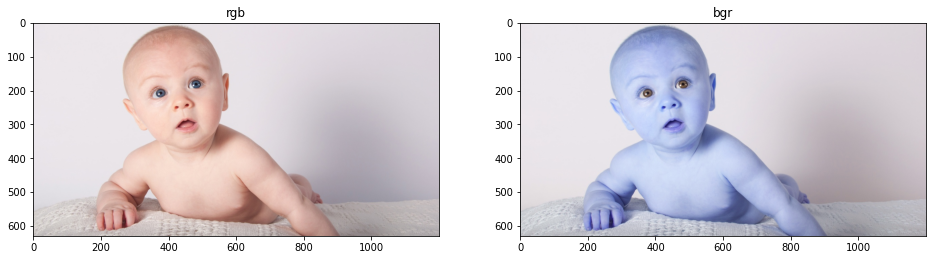

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_bgr = cv2.imread('./image/baby.jpg', 1)      # 使用 OpenCV 讀取圖檔

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # 將 BGR 圖片轉為 RGB 圖片
# img_rgb = img_bgr[:,:,::-1]                         # 或是這樣亦可

plt.figure(figsize=(16, 9))                # 使用 Matplotlib 顯示圖片
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('rgb')

plt.subplot(122), plt.imshow(img_bgr), plt.title('bgr')
plt.imshow

cv2.imshow('bgr', img_bgr)                     # cv2 show bgr
cv2.waitKey(0)                                 # 0 wait for anykey任意按鍵, try 3000
cv2.destroyAllWindows()
cv2.waitKey(1)

### Write / Save image file : imwrite()

In [10]:
import cv2

img0 = cv2.imread('./image/baby.jpg', 0)    # 0 灰階
cv2.imwrite('./image/baby01.jpg', img0)

True

## 1-3: OpenCV 影像基礎操作
><img src=".\image\array_3d.jpg"  style='height:300px; width:600px'>

In [11]:
import cv2
import sys

img = cv2.imread('./image/lenaColor.png')    #調用cv2.imread()讀取影像

if img is None:
	sys.exit("無法讀取影像...")
else :
    print(f'img size : {img.shape}')
    cv2.imshow("Image Show", img)           #調用cv2.imshow() 顯示讀取進來的影像
cv2.waitKey(0)
cv2.destroyAllWindows() 
cv2.waitKey(1)

img size : (512, 512, 3)


-1

In [12]:
#指定pix位置 x, y
a=100
px = img[a, a]       # RGB 100, 100 的值
print(px)                #顯示BGR顏色數值

blue = img[a, a, 0]        # 0:Blue, 1:Green, 2:Red 指定 x, y座標上 0 通道到數值
print(blue)

img[a, a] = [0, 0, 0]      # 指定圖片像素值[B, G, R] 給 0 值
print(img[a, a])

[ 78  68 178]
78
[0 0 0]


In [13]:
#更好的像素讀取編輯方式
#基於numpy的資料格式指定物件
img = cv2.imread('./image/lenaColor.png')    #調用cv2.imread()讀取影像

print(f'(10, 10, 2)像素的紅色數值\t: {img.item(10, 10, 2)}')   # 0:Blue, 1:Green, 2:Red
print(f'(10, 10, 2)像素的紅色數值\t: {img[10, 10, 2]}\n')        # 0:Blue, 1:Green, 2:Red

#修改像素值 itemset
img.itemset((10, 10, 2), 120) # set (10, 10, 2) = 120
img[10, 10, 2] = 120          # set (10, 10, 2) = 120

print(f'after itemset\t\t: {img.item(10, 10, 2)}') # 120
print(f'after img[10,10,2]\t: {img[10, 10, 2]} \n')  # 120

print(f'img.shape\t\t: {img.shape}')  #行、列、通道;圖像長寬與通道數(channels),可以判斷灰階或彩圖
print(f'img.size\t\t: {img.size}')   #像素總量 w*h*c
print(f'img.dtype\t\t: {img.dtype}')  #像素資料型態 uint8(0~255)

(10, 10, 2)像素的紅色數值	: 226
(10, 10, 2)像素的紅色數值	: 226

after itemset		: 120
after img[10,10,2]	: 120 

img.shape		: (512, 512, 3)
img.size		: 786432
img.dtype		: uint8


### Corp_image - ROI ( Region of Interest )

In [11]:
#分割圖像區域
logo = img[100:400, 150:415]    # x1, x2, : y1, y2
print(f'logo size : {logo.shape}')

cv2.imshow('Image Show', logo)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

logo size : (300, 265, 3)


-1

In [12]:
import numpy as np
import cv2

img = cv2.imread('./image/assassin.jpg')
cropped = img[100:400, 200:500] 

cv2.imshow('Original', img)
cv2.imshow('assassin face', cropped)
print(f'cropped size : {cropped.shape}')

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

cropped size : (300, 300, 3)


-1

### 分割與合併，色彩通道

In [13]:
img = cv2.imread('./image/assassin.jpg')

b, g, r = cv2.split(img)     #分割通道
	
# b = img[:,:,0];  g = img[:,:,1];  r = img[:,:,2]  #也可以陣列指定通道分割
print(f'{b.shape}\n{r}')

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

cv2.imshow('rgb', cv2.merge([r,g,b]))
cv2.imshow('bgr', cv2.merge([b,g,r]))

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

(489, 800)
[[ 94  94  93 ... 153 154 154]
 [ 96  95  93 ... 152 153 153]
 [ 98  97  94 ... 152 152 153]
 ...
 [ 85  76  71 ...  97  76  60]
 [ 85  76  77 ... 107  83  56]
 [ 67  72  90 ...  80  71  55]]


-1

### image 3D data

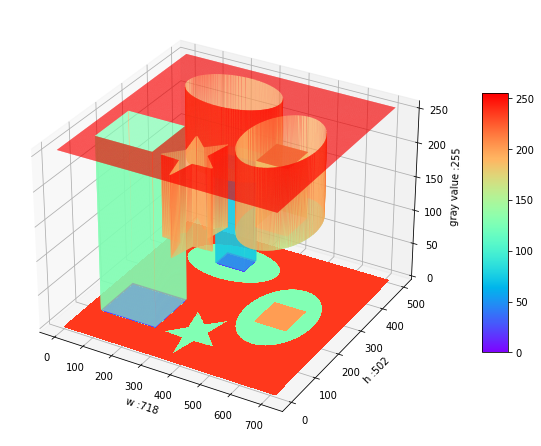

-1

In [14]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import cv2

# from matplotlib import cm

img1 = cv2.imread('./image/contour.png', 0)  # queryImage
# img1 = cv2.imread('./image/blackhat.bmp', 0)  # queryImage
# img1 = cv2.imread('./image/contour.png', 0)  # queryImage

w, h = img1.shape
X = np.arange(0, h, 1)
Y = np.arange(0, w, 1)
X, Y = np.meshgrid(X, Y)
# Z=img1

fig = plt.figure(figsize=(12, 6))
ax = Axes3D(fig)
# ax.view_init(30, 0)
surf = ax.plot_surface(X, Y, img1, rstride=1, cstride=1 , cmap=plt.get_cmap('rainbow'))

fig.colorbar(surf, shrink=.6, aspect=10)

ax.contourf(X, Y, img1, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))
ax.set_zlim(0, 255)
ax.set_xlabel('w :'+str(h));   ax.set_ylabel('h :'+str(w));   ax.set_zlabel('gray value :255');
plt.show()

cv2.imshow('bgr', cv2.imread('./image/contour.png', 1))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

---

# Module 2. OpenCV 繪圖

## 2-1: 基礎繪圖
> OpenCV 在圖片上加上線條等幾何圖案以及文字標示。在影像處理的程式中，若要比較清楚呈現處理的結果，時常會需要在圖片上加上一些標示的幾何圖形或是文字，比方說在物件辨識的問題上，可能會使用方框將辨識出來的物件框起來，並加註一些文字描述等。

### line : cv2.line ( 影像, 開始座標, 結束座標, 顏色, 線條寬度 )

In [15]:
import cv2 
import numpy as np

gc = np.zeros((512, 512, 3), dtype=np.uint8)
gc.fill(255)              # 用(B, G, R) = (255, 255, 255): 白色填滿畫布
# gc[:]=[48, 213,254]     # 給畫布不同的顏色

cv2.line(gc, (10, 50), (400, 300), (255, 0, 0), 5)
cv2.line(gc, (100, 50), (400, 500), (0, 0, 255), 3)
cv2.imshow('draw', gc) 

cv2.waitKey(0)
gc.fill(255)        # 白色填滿畫布
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### rectangle : cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)

In [16]:
cv2.rectangle(gc, (30, 50), (200, 280), (0, 0, 255), 5)
cv2.rectangle(gc, (100, 200), (296, 376), (234, 151, 102), -1)   # -1 : 實心框
cv2.imshow('draw', gc) 

cv2.waitKey(0)
gc.fill(255)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### circle : cv2.circle ( 影像, 圓心座標, 半徑, 顏色, 線條寬度 )

In [17]:
cv2.circle(gc, (200, 100), 80, (255, 255, 0), -2)
cv2.circle(gc, (280, 180), 60, (147, 147, 147), 3)
cv2.imshow('draw', gc) 

cv2.waitKey(0)
gc.fill(255)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### ellipse : cv2.ellipse ( 影像, 中心座標, (長軸, 短軸), 旋轉角度, 起始角度, 結束角度, 顏色, 線條寬度 )

In [18]:
cv2.ellipse(gc, (200, 100), (80, 40), 45, 0, 360, (80, 127, 255), 5)
cv2.ellipse(gc, (250, 300), (90, 50), 0, 0, 270, (44, 141, 108), -1)
cv2.imshow('draw', gc) 

cv2.waitKey(0)
gc.fill(255)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### cv2.polylines ( 影像, 頂點座標, 封閉型, 顏色, 線條寬度 )

In [19]:
#設定頂點座標
pts = np.array(((10,5), (100,100), (170,120), (200,50)))

cv2.polylines(gc, [pts], 0, (105, 105, 105), 2)  #True:頭尾相連; False:頭尾不相連

cv2.imshow('draw', gc) 
cv2.waitKey(0)
gc.fill(255)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Image Operation ( +, add )

In [20]:
import cv2
import numpy as np

img1 = np.random.randint(0, 256, size=[3,3], dtype=np.uint8)
img2 = np.random.randint(0, 256, size=[3,3], dtype=np.uint8)

print(img1, '\n')
print(img2, '\n')
print(img1+img2, '\n')           # still np.uint8, sign problem
print(cv2.add(img1,img2), '\n')  # 255 飽和

[[104 164 133]
 [254 111 131]
 [ 92 111  17]] 

[[ 53 254 180]
 [232  91 242]
 [162 151  38]] 

[[157 162  57]
 [230 202 117]
 [254   6  55]] 

[[157 255 255]
 [255 202 255]
 [254 255  55]] 



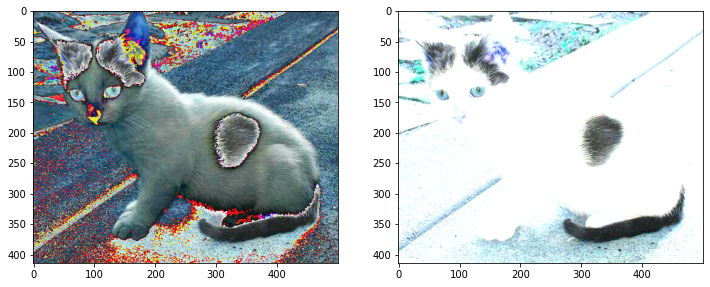

-1

In [21]:
import cv2

img1=cv2.imread('./image/cat.jpg', cv2.IMREAD_COLOR)
img2=cv2.imread('./image/cat.jpg', cv2.IMREAD_COLOR)

cv2.imshow('img1+img2', img1+img2)
cv2.imshow('cv2.add(img1, img2)', cv2.add(img1,img2))

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(img1+img2)   # same as img*2

plt.subplot(122)
plt.imshow(cv2.add(img1, img2))  # same as add(img1, img2)
plt.show()

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

### img + 50

In [ ]:
import cv2

img1=cv2.imread('./image/cat.jpg', cv2.IMREAD_COLOR)

cv2.imshow('img1', img1)
cv2.imshow('img1+50', cv2.add(img1, 50))

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

### Image Operation ( ADD Weighted )

In [22]:
import cv2

img1=cv2.imread('./image/cat.jpg', cv2.IMREAD_COLOR)
img2=cv2.imread('./image/lenaColor.png', cv2.IMREAD_COLOR)

img1 = cv2.resize(img1, (450, 450))
img2 = cv2.resize(img2, (450, 450))

result = cv2.addWeighted(img1, 0.8, img2, 0.2, 0)  # img1 * 0.4 + img2 * 0.6 + 0

cv2.imshow('weighted image', result)

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### bitwise : and, or, xor, not
><img src=".\image\truth-table.png"  style='height:250px; width:750px'>

In [23]:
import numpy as np
import cv2
# import matplotlib.pyplot as plt

rectangle = np.zeros((300, 300), dtype = "uint8")          # zero 黑色畫布
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)   # Draw filled rectangle
cv2.imshow("Rectangle", rectangle)
cv2.waitKey(0)

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)              # Draw filled circle
cv2.imshow("Circle", circle)
cv2.waitKey(0)

bitwiseAnd = cv2.bitwise_and(rectangle, circle)           # and expression
cv2.imshow("AND", bitwiseAnd)
cv2.waitKey(0)

bitwiseOr = cv2.bitwise_or(rectangle, circle)             # or expression
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0)

bitwiseXor = cv2.bitwise_xor(rectangle, circle)          # xor expression
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

bitwiseNot = cv2.bitwise_not(circle)                     # not expression
cv2.imshow("NOT", bitwiseNot)

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### font

><img src=".\image\font.jpg"  style='height:250px; width:520px'>
### cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)

In [1]:
import numpy as np
import cv2

#建立 512x512 的黑色畫布
gc = np.zeros((512, 512, 3), np.uint8)
gc.fill(255)    #用(B, G, R) = (255, 255, 255): 白色填滿畫布

font = [cv2.FONT_HERSHEY_SIMPLEX,
        cv2.FONT_HERSHEY_PLAIN,
        cv2.FONT_HERSHEY_DUPLEX,
        cv2.FONT_HERSHEY_COMPLEX,
        cv2.FONT_HERSHEY_TRIPLEX,
        cv2.FONT_HERSHEY_COMPLEX_SMALL,
        cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
        cv2.FONT_HERSHEY_SCRIPT_COMPLEX ]

y = 50
for f in font:
    cv2.putText(gc, 'OpenCV', (10, y), f, 2, (0,0,0), 2, cv2.LINE_AA)
    y += 60

cv2.imshow("draw", gc)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 2-2: 滑鼠交互
### onmouse(event, x, y, flags, param)

> 事件代號 (int event), 座標 (int x,int y), 旗標代號 (int flag), 滑鼠事件的代號名稱 (param)
> * event : 代表的是滑鼠回傳的事件號碼，每當滑鼠有動作，event就會回傳訊息到 onMouse()，也順便回傳滑鼠移動的座標
> * flag : 代表的是拖曳事件
> * param : 則是自己定義 onMouse() 事件的ID，就跟 GUI 介面的視窗介面 ID 一樣 (cvGetWindowHandle())，不過這邊是自己給的編號，而視窗介面的 ID 則是系統自動隨機分配的 ID，而滑鼠事件的執行可以細分為：

>>### event :
|      事件 event       | 值 |  動作   |
|:---------------------:|:-:|:-------:|
|CV_EVENT_MOUSEMOVE     | 0 |   滑動   |
|CV_EVENT_LBUTTONDOWN   | 1 | 左鍵點擊 |
|CV_EVENT_RBUTTONDOWN   | 2 | 右鍵點擊 |
|CV_EVENT_MBUTTONDOWN   | 3 | 中鍵點擊 |
|CV_EVENT_LBUTTONUP     | 4 | 左鍵放開 |
|CV_EVENT_RBUTTONUP     | 5 | 右鍵放開 |
|CV_EVENT_MBUTTONUP     | 6 | 中鍵放開 |
|CV_EVENT_LBUTTONDBLCLK | 7 | 左鍵雙擊 |
|CV_EVENT_RBUTTONDBLCLK | 8 | 右鍵雙擊 |
|CV_EVENT_MBUTTONDBLCLK | 9 | 中鍵雙擊 |

>>### Flag : 
|       旗標 flag       | 值 |  動作   |
|:---------------------:|:--:|:---------------------:|
|CV_EVENT_FLAG_LBUTTON  | 1  |  左鍵拖曳              |
CV_EVENT_FLAG_RBUTTON   | 2  |  右鍵拖曳              |
CV_EVENT_FLAG_MBUTTON   | 4  |  中鍵拖曳              |
CV_EVENT_FLAG_CTRLKEY   | 8  | (8~15)按Ctrl不放事件   |
CV_EVENT_FLAG_SHIFTKEY  | 16 | (16~31)按Shift不放事件 |
CV_EVENT_FLAG_ALTKEY    | 32 | (32~39)按Alt不放事件   |

In [4]:
import cv2

def onmouse(event, x, y, flags, param):   #標準滑鼠互動函式
    if event == 1:                          #當滑鼠移動時
        print(f'gray:{img[y, x]}, x:{x}, y:{y},', end='     ')  #顯示滑鼠所在畫素的數值，注意畫素表示方法和座標位置的不同
#========= main =====================
img= cv2.imread('./image/mybaby.jpg')       #定義圖片位置
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #轉化為灰度圖

cv2.namedWindow('img')                     #構建視窗
cv2.setMouseCallback('img', onmouse)       #回撥繫結視窗

while True:                                #無限迴圈
    cv2.imshow('img', img)
    if cv2.waitKey() == 27:               #按下‘ESC'鍵，退出
        break                      

cv2.destroyAllWindows()                    #關閉視窗
cv2.waitKey(1)

gray:233, x:67, y:37,     gray:218, x:154, y:83,     gray:224, x:156, y:122,     gray:228, x:175, y:122,     gray:228, x:175, y:122,     

-1

### 長方形拖曳

In [27]:
import cv2
import numpy as np

drawing = False
ix, iy = -1, -1

def draw_rect(event, x, y, flags, param):
    global ix, iy, drawing, mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, (ix,iy), (x,y), (0,255,0), 1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, (ix,iy), (x,y), (0,255,0), 1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_rect)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
         break
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 2-3: 滾動條

In [5]:
import cv2
import numpy as np

# callbacks
def nothing(x):
    pass

img = np.zeros((512, 512, 3), np.uint8)  # empty image
cv2.namedWindow('Track Bar')

# creat track bars
cv2.createTrackbar('R', 'Track Bar', 0, 255, nothing)   # in 'Track Bar' windows
cv2.createTrackbar('G', 'Track Bar', 0, 255, nothing)
cv2.createTrackbar('B', 'Track Bar', 0, 255, nothing)
cv2.createTrackbar('1:ON\n0:OFF', 'Track Bar', 0, 1, nothing)  # need nothing to call function

while True :
    R = cv2.getTrackbarPos('R', 'Track Bar')
    G = cv2.getTrackbarPos('G', 'Track Bar')
    B = cv2.getTrackbarPos('B', 'Track Bar')
    F = cv2.getTrackbarPos('1:ON\n0:OFF', 'Track Bar')

    if F == 1:
        img[:]=[B, G, R]
    else:
        img[:]=[0,0,0]
        
    cv2.imshow('Track Bar', img)
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### example HSV

In [14]:
import numpy as np
import cv2

def nothing(x):
    pass

pic = cv2.imread("./image/lenaColor.png", cv2.IMREAD_UNCHANGED)
pic1 = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)  # 將 BGR圖像轉化為 HSV 圖像

# 顯示原圖像做對比
cv2.namedWindow('old', cv2.WINDOW_NORMAL) 
cv2.imshow('old', pic) 

# 新圖像窗口
cv2.namedWindow('new', cv2.WINDOW_AUTOSIZE) 
#初始化滾動條
cv2.createTrackbar("H", 'new', 100, 150, nothing)
cv2.createTrackbar("S", 'new', 100, 150, nothing)
cv2.createTrackbar("V", 'new', 100, 150, nothing)

while True:
	# ESC按下退出
    if cv2.waitKey(10) == 27:
        print("finish !!!")
        break
	# 讀取滚動條現在的滾動條的 HSV 信息
    h_value = float(cv2.getTrackbarPos("H", 'new')/100)
    s_value = float(cv2.getTrackbarPos("S", 'new')/100)
    v_value = float(cv2.getTrackbarPos("V", 'new')/100)
	# 拆分、讀入新數據後，重新合成調整後的圖片
    H, S, V = cv2.split(pic)
    new_pic = cv2.merge([np.uint8(H*h_value) , np.uint8(S*s_value) , np.uint8(V*v_value)])
    cv2.imshow('new', new_pic)

cv2.destroyAllWindows()
cv2.waitKey(1)

finish !!!


-1

---

# Module 3. 色彩空間
> 色彩空間是描述使用一組值（通常使用三個、四個值或者顏色成分）表示顏色方法的抽像數學模型，也被稱作「色域」。

> 通常使用``RGB（紅色、綠色、藍色）``色彩空間定義，這是另外一種生成同樣顏色的方法，紅色、綠色、藍色被當作X、Y和Z坐標軸。另外一個生成同樣顏色的方法是使用``色相（X軸）、飽和度（色度）（Y軸）和明度（Z軸）``表示，這種方法稱為HSV色彩空間。另外還有許多其它的色彩空間，許多可以按照這種方法用三維（X、Y、Z）、更多或者更少維表示，但是有些根本不能用這種方法表示。

## 3-1: RGB
> RGB色彩空間是RGB色彩空間之一，以單色（單一波長）原色的特定集合著稱

> 最常用的是 24 位實現方法，也就是紅綠藍每個通道有 8 位元或者 256 色級。基於這樣的 24 位 RGB 模型的色彩空間可以表現 ``256×256×256 ≈ 1677`` 萬色。一些實現方法採用每原色 16 位元，能在相同範圍內實現更高更精確的色彩密度。這在寬域色彩空間中尤其重要，因為大部分通常使用的顏色排列的相對更緊密。

> 為什麼 RGB 不夠好 !!!

> 任何的色彩都可由紅、綠、及藍三原色光混合而成，而 CRT、LCD 顯示及電漿螢幕等，確實都透過套用不同的紅、綠、及藍色次像素（Sub-Pixel）陣列的密度，而產生彩色影像。但事實上，有許多色彩卻是沒辦法以這樣的方法產生。尤其是，沒辦法產生各式各樣的青綠色（Blue-Green)

In [16]:
import cv2

image = cv2.imread('./image/assassin.jpg')
cv2.imshow("Original", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

image[:2]  # 3D BGR

array([[[118, 111,  94],
        [118, 111,  94],
        [117, 110,  93],
        ...,
        [174, 178, 153],
        [175, 179, 154],
        [175, 179, 154]],

       [[120, 113,  96],
        [119, 112,  95],
        [117, 110,  93],
        ...,
        [173, 177, 152],
        [174, 178, 153],
        [174, 178, 153]]], dtype=uint8)

### BGR to RGB

In [17]:
import cv2
import numpy as np
# img=np.random.randint(0,256,size=[2,4,3],dtype=np.uint8)
img = cv2.imread('./image/assassin.jpg')

rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bgr=cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)

cv2.imshow("Original", img)
cv2.imshow("rgb", rgb)
cv2.imshow("bgr", bgr)

print("img=\n", img[:2],'\n')
print("rgb=\n", rgb[:2],'\n')
print("bgr=\n", bgr[:2],'\n')

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

img=
 [[[118 111  94]
  [118 111  94]
  [117 110  93]
  ...
  [174 178 153]
  [175 179 154]
  [175 179 154]]

 [[120 113  96]
  [119 112  95]
  [117 110  93]
  ...
  [173 177 152]
  [174 178 153]
  [174 178 153]]] 

rgb=
 [[[ 94 111 118]
  [ 94 111 118]
  [ 93 110 117]
  ...
  [153 178 174]
  [154 179 175]
  [154 179 175]]

 [[ 96 113 120]
  [ 95 112 119]
  [ 93 110 117]
  ...
  [152 177 173]
  [153 178 174]
  [153 178 174]]] 

bgr=
 [[[118 111  94]
  [118 111  94]
  [117 110  93]
  ...
  [174 178 153]
  [175 179 154]
  [175 179 154]]

 [[120 113  96]
  [119 112  95]
  [117 110  93]
  ...
  [173 177 152]
  [174 178 153]
  [174 178 153]]] 



-1

## 3-2: Gray
> 基礎 : 對於彩色轉灰度，有一個很著名的心理學公式：

>> $Gray = R * 0.299 + G * 0.587 + B * 0.114$

> 整數算法

>>而實際應用時，希望避免低速的浮點運算，所以需要整數算法。注意到係數都是3位精度，我們可以將它們縮放1000倍來實現整數運算算法：

>> $ Gray = (R * 299 + G * 587 + B * 114 + 500) / 1000 $

>>RGB一般是8位精度，現在縮放1000倍，所以上面的運算是32位整型的運算。注意後面那個除法是整數除法，所以需要加上500來實現四捨五入。就是由於該算法需要32位運算，所以該公式的另一個變種很流行：

>> $Gray = (R * 30 + G * 59 + B * 11 + 50) / 100$

### BGR to Gray

In [18]:
# 206 types of cvtColor
# Gray
image = cv2.imread('./image/assassin.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

cv2.waitKey(0)
cv2.destroyAllWindows()
print('image : ', image[:2], '\n')
print('gray : ', gray[:2])   # row 0 ~ 1, 全部 column 

image :  [[[118 111  94]
  [118 111  94]
  [117 110  93]
  ...
  [174 178 153]
  [175 179 154]
  [175 179 154]]

 [[120 113  96]
  [119 112  95]
  [117 110  93]
  ...
  [173 177 152]
  [174 178 153]
  [174 178 153]]] 

gray :  [[107 107 106 ... 170 171 171]
 [109 108 106 ... 169 170 170]]


### Gray to BGR

In [ ]:
import cv2
import numpy as np
# img = cv2.imread('./image/lady_gray.png')      # error 
img = cv2.imread('./image/lenaGray.bmp', cv2.IMREAD_GRAYSCALE)

rst=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img[:2], rst[:2]   # row 0 ~ 1, 全部 column

## 3-3: HSV
 * HSL即色相、飽和度、亮度（英語：Hue, Saturation, Lightness）。
 * HSV即色相、飽和度、明度（英語：Hue, Saturation, Value），又稱HSB，其中B即英語：Brightness。另外一個生成同樣顏色的方法是使用 : 色相（X軸）、飽和度（色度）（Y軸）和明度（Z軸）表示，這種方法稱為 HSV 色彩空間

> * 色調(Hue) : 色彩的顏色名稱，如紅色、黃色等<br>
> 在HSL中，色調(Hue)決定了的顏色， 用360度來劃分，就像傳統的色輪。 HSL相對於RGB顏色的主要優勢之一是互補色彼此相對， 這使得整個系統非常直觀。

> * 飽和度(Saturation) : 色彩的純度，越高色彩越純，低則逐漸變灰，數值為 0-100%<br>
> 與色輪中心的距離稱為"飽和度"。 仔細觀察上面的色輪，距離圓心越遠，顏色更明亮，更鮮豔。

> * 明度（Value），亮度(Lightness) : 數值為 0-100%。

>><img src=".\image\hsl-hsv.png"  style='height:400px; width:520px'>
https://www.itread01.com/content/1549111148.html

https://zh.wikipedia.org/zh-tw/HSL%E5%92%8CHSV%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4

### HSV 色調 (Hue) : 0 ~ 360, 
#### OpenCV <br>
> * ``Hue : [0, 179]``<br>
> * Saturation : [0, 255]<br>
> * Value : [0, 255]

In [22]:
import cv2
import numpy as np

#=========test blue in HSV=============
imgBlue=np.zeros([1,1,3],dtype=np.uint8)
imgBlue[0,0,0]=255
Blue=imgBlue
BlueHSV=cv2.cvtColor(Blue,cv2.COLOR_BGR2HSV)
print("Blue\t\t= ",Blue)
print("BlueHSV\t\t= ",BlueHSV, '\n')

#=========test green in HSV=============
imgGreen=np.zeros([1,1,3],dtype=np.uint8)
imgGreen[0,0,1]=255
Green=imgGreen
GreenHSV=cv2.cvtColor(Green,cv2.COLOR_BGR2HSV)
print("Green\t\t= ",Green)
print("GreenHSV\t= ",GreenHSV, '\n')

#=========test red in HSV=============
imgRed=np.zeros([1,1,3],dtype=np.uint8)
imgRed[0,0,2]=255
Red=imgRed
RedHSV=cv2.cvtColor(Red,cv2.COLOR_BGR2HSV)
print("Red\t\t= ",Red)
print("RedHSV\t\t= ",RedHSV)

Blue		=  [[[255   0   0]]]
BlueHSV		=  [[[120 255 255]]] 

Green		=  [[[  0 255   0]]]
GreenHSV	=  [[[ 60 255 255]]] 

Red		=  [[[  0   0 255]]]
RedHSV		=  [[[  0 255 255]]]


### XYZ :
><img src=".\image\rgb2xyz.jpg"  style='height:250px; width:520px'>

http://www.brucelindbloom.com/index.html?Eqn_RGB_XYZ_Matrix.html

### Lab
> * L – Lightness ( Intensity ).
> * a – color component ranging from Green to Magenta.
> * b – color component ranging from Blue to Yellow

>Lab 顏色空間與 RGB 顏色空間完全不同。在 RGB 顏色空間中，顏色信息分為三個通道，但是相同的三個通道也對亮度信息進行編碼。另一方面，在 Lab 顏色空間中，L通道與顏色信息無關，並且僅編碼亮度。其他兩個通道對顏色進行編碼。它具有以下屬性。

> * 感知均勻的色彩空間，近似我們對色彩的感知方式。
> * 與設備無關（捕獲或顯示）。
> * 在 Adobe Photoshop 中廣泛使用。
> * 通過複雜的轉換方程與 RGB 顏色空間相關。

In [23]:
# Hue, Saturation, Value
import cv2

# BGR
img = cv2.imread('./image/lenaColor.png',1)
cv2.imshow('original', img)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV', hsv)

# Hue, Lightness/Luminance, Saturation
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
cv2.imshow('HLS', hls)

# Lightness, A(Green..Red), B(Blue..Yellow)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow('L*a*b*', lab)

XYZ = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
cv2.imshow('XYZ', XYZ)
print(f'original :\n{img[:2]}\n\n'
      f'HSV :\n{hsv[:2]}\n\n'
      f'HLS :\n{hls[:2]}\n\n'
      f'L*a*b* :\n{lab[:2]}\n\n'
      f'XYZ :\n{XYZ[:2]}')

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

original :
[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]]

HSV :
[[[  4 114 226]
  [  4 114 226]
  [  1 103 223]
  ...
  [  7 120 230]
  [  5 128 221]
  [  2 140 200]]

 [[  4 114 226]
  [  4 114 226]
  [  1 103 223]
  ...
  [  7 120 230]
  [  5 128 221]
  [  2 140 200]]]

HLS :
[[[  4 176 162]
  [  4 176 162]
  [  1 178 149]
  ...
  [  7 176 174]
  [  5 166 158]
  [  2 145 128]]

 [[  4 176 162]
  [  4 176 162]
  [  1 178 149]
  ...
  [  7 176 174]
  [  5 166 158]
  [  2 145 128]]]

L*a*b* :
[[[169 161 149]
  [169 161 149]
  [168 160 144]
  ...
  [176 156 155]
  [163 161 154]
  [138 167 152]]

 [[169 161 149]
  [169 161 149]
  [168 160 144]
  ...
  [176 156 155]
  [163 161 154]
  [138 167 152]]]

XYZ :
[[[165 155 139]
  [165 155 139]
  [165 155 147]
  ...
  [170 164 138]
  [157 148 124]
  [134 120 101]]

 [[165 155 139]
  [165

-1

### InRange

In [1]:
import cv2
import numpy as np
img=np.random.randint(0, 255, size=[5, 5], dtype=np.uint8)
min=100; max=200

mask = cv2.inRange(img, min, max)   # 有一點像 thresh   min < 1 < max =>255
print("img=\n", img, '\n')
print("mask=\n", mask)

img=
 [[220 240 184 142   0]
 [227  59  81   7  34]
 [ 33  95 125 192 126]
 [113 251 185 222  18]
 [  3 189 200 114 166]] 

mask=
 [[  0   0 255 255   0]
 [  0   0   0   0   0]
 [  0   0 255 255 255]
 [255   0 255   0   0]
 [  0 255 255 255 255]]


### Mask

In [2]:
import cv2
import numpy as np

img=np.ones([5, 5], dtype=np.uint8)*9  # img.fill(9)

mask =np.zeros([5, 5], dtype=np.uint8)
mask[0:3, 0]=1; mask[2:5, 2:4]=1

roi=cv2.bitwise_and(img, img, mask = mask)
print("img=\n",img, '\n')
print("mask=\n",mask, '\n')
print("roi=\n",roi)

img=
 [[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]] 

mask=
 [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 1 1 0]
 [0 0 1 1 0]
 [0 0 1 1 0]] 

roi=
 [[9 0 0 0 0]
 [9 0 0 0 0]
 [9 0 9 9 0]
 [0 0 9 9 0]
 [0 0 9 9 0]]


### in HSV range
><img src=".\image\HSVinRange.png"  style='height:250px; width:520px'>

> 結合 cv2.inRange() 可以清晰看到某個顏色區域影像位於影像的什麼地方。<br>
> 用法 cv2.inRange(img, low, high)，函式會將位於兩個區域間的值置為 255，位於區間外的值置為 0。<br>
> 比如想要看到青色的區域處於影像中的什麼位置，青色的區域是 [78, 43, 46], [99, 255, 255]

### range of blue, green, red

In [25]:
import cv2
import numpy as np
opencv=cv2.imread("./image/opencv.jpg")
hsv = cv2.cvtColor(opencv, cv2.COLOR_BGR2HSV)

cv2.imshow('opencv', opencv)
cv2.imshow('hsv', hsv)
cv2.waitKey()
#=============blue range=============
minBlue = np.array([100,43,46])       # 從 HSV 色彩空間 110 ~ 130
maxBlue = np.array([124,255,255])
mask_b = cv2.inRange(hsv, minBlue, maxBlue)

blue = cv2.bitwise_and(opencv, opencv, mask= mask_b)
cv2.imshow('blue', blue)
cv2.waitKey()
#=============green range=============
minGreen = np.array([35,43,46])          # 從 HSV 色彩空間 50 ~ 70
maxGreen = np.array([77,255,255])
mask_g = cv2.inRange(hsv, minGreen, maxGreen)

green = cv2.bitwise_and(opencv, opencv, mask= mask_g)
cv2.imshow('green', green)
cv2.waitKey()
#=============red range=============
minRed = np.array([0,43,46])             # 從 HSV 色彩空間 0 ~ 30
maxRed = np.array([10,255,255])
mask_r = cv2.inRange(hsv, minRed, maxRed)

red= cv2.bitwise_and(opencv, opencv, mask= mask_r)
cv2.imshow('red', red)
cv2.waitKey()
#=============all in one============
mask = mask_b + mask_r + mask_g
all_inOne = cv2.bitwise_and(opencv, opencv, mask= mask) 
cv2.imshow('all_inOne', all_inOne)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### masking

In [3]:
import numpy as np
import cv2

image = cv2.imread('.\image\mybaby.jpg')
cv2.imshow("Original", image)
print(image.shape)
cv2.waitKey(0)

# draw white rectangle on the center of the image
mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1]//2, image.shape[0]//2)
cv2.rectangle(mask, (cX-100,cY-100), (cX+100,cY+100), 255, -1)
cv2.imshow("Mask : rectangle", mask)
cv2.waitKey(0)

# masking image
masked = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Mask rect. to Image", masked)
cv2.waitKey(0)

# draw white circle on the center of the image
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
cv2.imshow("Mask : circle", mask)
cv2.waitKey(0)

# masking image
masked = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Mask circle to Image", masked)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

(315, 600, 3)


-1

### skin color in HSV range

In [ ]:
import cv2
img=cv2.imread("./image/lesson2.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(hsv)

minSkin = np.array([0,30,60])          # HSV 色彩空間 min
maxSkin = np.array([25,150,255])          # HSV 色彩空間 max

mask_skin = cv2.inRange(hsv, minSkin, maxSkin)
roi = cv2.bitwise_and(img, img, mask= mask_skin)

cv2.imshow("img", img)
cv2.imshow("ROI", roi)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

### BGR → HSV → BGR
> RGB 轉換 HSV 及 HSL <br>
> https://www.ginifab.com.tw/tools/colors/rgb_to_hsv_hsl.html

In [26]:
import cv2
img=cv2.imread("./image/barbara.bmp")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(hsv)     # 分開
v[:,:]=255              # value 亮度 最亮

newHSV=cv2.merge([h,s,v])     # 合併
art = cv2.cvtColor(newHSV, cv2.COLOR_HSV2BGR)

cv2.imshow("img",img)
cv2.imshow("newHSV",newHSV)
cv2.imshow("artBGR",art)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### OpenCV color space conversion
https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html

---

# Module 4. 圖片``幾何``轉換

## 4-1: 線性代數複習
> 矩陣相乘 :<br>
> $[ 2 * 2 ] x [ 2 * 2 ] = [ 2 * 2 ]$<br>
> $[ 2 * 3 ] x [ 3 * 2 ] = [ 2 * 2 ]$

><img src=".\image\matrix_product.jpg"  style='height:100px; width:800px'></img>

### 算術運算 Add, Scale

In [ ]:
# Element wise Multiplication 
x = np.array([[1., 2.], [4., 5.]])
y = np.array([[6., 23.], [-1, 7]])
print(f'x =\n{x}\n\n'
      f'y =\n{y}\n'
      f'x + y =\n{x+y}\n\n'
      f'x * 2 =\n{x*2}\n\n'
      f'x * y =\n{x*y}') 

### dot 矩陣和矩陣 (向量) 相乘
$( M行, N列 ) * ( N行, L列 ) = ( M行, L列 )$<br>
$a . b=\begin{bmatrix}a_1 & a_2 & a_3 & a_4 & a_5\end{bmatrix}_{(1*n)}
\begin{bmatrix}b_1 \\ b_2 \\ b_3 \\ b_4 \\ b_5\end{bmatrix}_{(n*1)} = 
\begin{bmatrix}a_1 b_1 & a_2 b_2 & a_3 b_3 & a_4 b_4 & a_5 b_5\end{bmatrix}_{(1*1)}$

### Element wise
> $a x b=\begin{bmatrix}a_1 \\ a_2 \\ a_3 \\ a_4 \\ a_5\end{bmatrix}_{(n*1)}
\begin{bmatrix}b_1 \\ b_2 \\ b_3 \\ b_4 \\ b_5\end{bmatrix}_{(n*1)} = 
\begin{bmatrix}a_1 b_1 \\ a_2 b_2 \\ a_3 b_3 \\ a_4 b_4 \\ a_5 b_5\end{bmatrix}_{(n*1)}$

In [ ]:
x = np.array([[1., 2.], [4., 5.]])
y = np.array([[6., 23.], [-1, 7]])
x, y, x.dot(y)

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x, y, x.dot(y)

### 二者都是矩陣乘法。 np.matmul 中禁止矩陣與標量的乘法。 在向量乘向量的內積運算中，np.matmul 與 np.dot 沒有區別。

In [ ]:
np.dot(x, y), np.matmul(x, y), np.dot(x, 5)
# np.matmul(x, 5)  # error

### Transpose
><img src=".\image\matrixT.png"  style='height:200px; width:500px'></img>

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x, x.T, y, y.T

### Inverse

In [ ]:
y = np.array([[6., 23.], [-1, 7]])
np.linalg.inv(y)

$AA^{-1} = 1$

In [ ]:
np.dot(np.linalg.inv(y), y)

## 4-2: 圖片幾何轉換介紹
> 座標位置 row, column 轉換 (非 RGB 轉換 ) : 縮放(resize)、翻轉(flip)、平移(translate)、旋轉(Rotate)、仿射(Affine)<br>
><img src=".\image\resize.jpg"  style='height:300px; width:700px'></img>
><img src=".\image\homogen.jpg"  style='height:300px; width:700px'></img>

>> $ M = \begin{pmatrix} W&A&X\\B&H&Y\\0&0&1 \end{pmatrix}$<br>
>>  W, H : 長寬的放大, 縮小<br>
>>  X, Y : 位置的平移

## 4-3: OpenCV圖片幾何轉換

> Scaling - resize() : 縮放只是調整影像大小<br>
><img src=".\image\resize01.jpg"  style='height:300px; width:600px'></img>

> ### 最後一個引數 interpolation 表示插值方式：<br>

>| 插值方式       | 名稱          | 說明                                                           |
>|:-------------:|:-------------:|:--------------------------------------------------------------:|
>|INTER_NEAREST  | 最近鄰插值     | 邊緣不會出現緩慢的漸慢過度區域，這也導致放大的圖像容易出現鋸齒的現像 |
>|INTER_LINEAR   | 線性插值（預設) | 線性插值是以距離為權重的一種插值方式。                            |
>|INTER_AREA     | 區域插值       | 使用圖元區域關係進行重採樣。它可能是圖像抽取的首選方法，因為它會產生無雲紋理的結果。但是當圖像縮放時，它類似於INTER_NEAREST方法 |
>|INTER_CUBIC    | 三次樣條插值    | ``是用某種3次方函數差值``, 可以有效避免出現鋸齒的現像, 4x4圖元鄰域的雙三次插值  |
>|INTER_LANCZOS4 | Lanczos插值    | 是跟``傅立葉轉換``有關的三角函數的方法, 8x8圖元鄰域的Lanczos插值      |

<img src=".\image\resize.png"  style='height:150px; width:700px'></img>
https://blog.csdn.net/guyuealian/article/details/85097633

### interpolation 插補

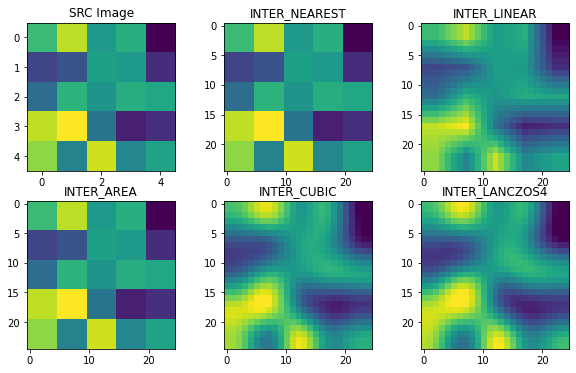

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.uint8(np.random.randint(0,255,size=(5,5)))
height,width= img.shape

new_dimension = (25, 25)
plt.figure(figsize=(10,6))

plt.subplot(231), 
plt.title('SRC Image'), plt.imshow(img)

plt.subplot(232)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_NEAREST)
plt.title('INTER_NEAREST'), plt.imshow(resized)

plt.subplot(233)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_LINEAR)
plt.title('INTER_LINEAR'), plt.imshow(resized)

plt.subplot(234)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_AREA)
plt.title('INTER_AREA'), plt.imshow(resized)

plt.subplot(235)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_CUBIC)
plt.title('INTER_CUBIC'), plt.imshow(resized)

plt.subplot(236)
resized = cv2.resize(img, new_dimension, interpolation = cv2.INTER_LANCZOS4)
plt.title('INTER_LANCZOS4'), plt.imshow(resized)

plt.show()

### Scaling

In [29]:
import cv2
img=cv2.imread('./image/cat.jpg')

print(img.shape)
resized_img1 = cv2.resize(img,(250, 200))   # 200 * 200 pixels
resized_img2 = cv2.resize(img, None, fx=1.6, fy=1.6, interpolation=cv2.INTER_AREA)  # 1.6 比例放大

cv2.imshow('original 414*500', img)
cv2.imshow('resized image1 250*200', resized_img1)
cv2.imshow('resized image2 1.6*1.6', resized_img2)

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

(414, 500, 3)


-1

In [ ]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('.\image\mybaby.jpg',0)
cv2.imshow('original',img)

# zoom image
h, w = img.shape[:2]
res = cv2.resize(img, (w*2, h*2), interpolation = cv2.INTER_CUBIC)   #  w*2, h*2
cv2.imshow('zoom image 2*2', res)

# shrink image, using other parameters
res = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA) # fx=0.5, fy=0.5
cv2.imshow('shrink image 0.5*0.5',res)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

### 速度比較 :
> INTER_NEAREST（最近鄰插值) > INTER_LINEAR(線性插值) > INTER_CUBIC(三次樣條插值) > INTER_AREA  (區域插值)<br>
> 對圖像進行縮小時，為了避免出現波紋現像，推薦採用INTER_AREA 區域插值方法。

> OpenCV推薦 : <br>
> 如果要``縮小``圖像，通常推薦使用 ``INTER_AREA`` 插值效果最好，而要``放大``圖像，通常使用 ``INTER_CUBIC`` (速度較慢，但效果最好)，或者使用 ``INTER_LINEAR`` (速度較快，效果還可以)。

>至於最近鄰插值 INTER_NEAREST，一般不推薦使用

### Flip
> src ：原始影像。<br>
> flipCode ：翻轉方向
> * $flipCode = 0$ ，則以 X (水平) 軸為對稱軸翻轉
> * $flipCode > 0$ ，則以 Y (垂直) 軸為對稱軸翻轉
> * $flipCode < 0$ ，則在 X (水平) 軸、 Y (垂直) 軸方向同時翻轉

In [45]:
import cv2
img = cv2.imread('./image/cat.jpg')

flip_x = cv2.flip(img, 0)
flip_y = cv2.flip(img, 2)
flip_xy = cv2.flip(img, -1)

cv2.imshow('origin', img)
cv2.imshow('flip x ', flip_x)
cv2.imshow('flip y ', flip_y)
cv2.imshow('flip xy', flip_xy)

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### flip image

In [ ]:
import numpy as np
import cv2

image = cv2.imread('.\image\mybaby.jpg')
cv2.imshow("Original", image)
cv2.waitKey(0)

flipped = cv2.flip(image, 1)
cv2.imshow("Flipped Horizontally left side right : 1", flipped)
cv2.waitKey(0)

flipped = cv2.flip(image, 0)
cv2.imshow("Flipped vertical upside down : 0", flipped)
cv2.waitKey(0)

flipped = cv2.flip(image, -1)
cv2.imshow("Flipped (left side right) and (upside down) : -1", flipped)
cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.waitKey(1)

### Translation
> $cv2.warpAffine(src, dst, tranformMatrix, size)$

> 在影像平移中我們會用到前三個引數：
> * src 對像，表示此操作的源（輸入圖像）。
> * dst 表示此操作的目標（輸出圖像）的對像。
> * 表示轉換矩陣的 tranformMatrix 對像。
> * size−整數類型的變量，表示輸出圖像的大小。

In [53]:
import cv2
import numpy as np
origin = cv2.imread('./image/cat.jpg')

trans_x = 80;  trans_y = 60
h, w = origin.shape[:2]
print('origin size : ', h, w)

M = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
print('M =\n', M)

# cv2.warpAffine()函數的第三個參數是輸出圖片的大小，應該是（width, height）的形式，記住width=列數，height=行數
trans_img = cv2.warpAffine(origin, M, (w, h))
cv2.imshow('origin', origin)
cv2.imshow('trans_img', trans_img)

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

origin size :  414 500
M =
 [[ 1.  0. 80.]
 [ 0.  1. 60.]]


-1

In [49]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('.\image\mybaby.jpg',cv2.IMREAD_GRAYSCALE)

h, w = img.shape
M = np.float32([[1,0,100], [0,1,50]])
print('M =\n', M)

dst = cv2.warpAffine(img, M, (w, h))

cv2.imshow('translation image',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

M =
 [[  1.   0. 100.]
 [  0.   1.  50.]]


-1

### Rotation
><img src=".\image\rotation.jpg"  style='height:350px; width:900px'></img>
> 計算出一個二維旋轉的仿射矩陣
> * center ：旋轉中心座標
> * angle ：旋轉角度，正值意味著逆時針旋轉，座標原點為左上角
> * scale ：縮放比例

In [54]:
import cv2
import numpy as np
origin = cv2.imread('./image/cat.jpg')

h, w = origin.shape[:2]

M1 = cv2.getRotationMatrix2D((w/2, h/2), 45, 0.8) #表示旋轉的中心點,表示旋轉的角度,圖像縮放因子
M2 = cv2.getRotationMatrix2D((w/2, 0), 45, 0.9)
M3 = cv2.getRotationMatrix2D((0, h/2), -45, 0.6)
print(f'M1 =\n{M1}\n\nM2 =\n{M2}\n\nM3 =\n{M3}')

rotate_img1 = cv2.warpAffine(origin, M1, (w, h))
rotate_img2 = cv2.warpAffine(origin, M2, (w, h))
rotate_img3 = cv2.warpAffine(origin, M3, (w, h))

cv2.imshow('origin', origin)
cv2.imshow('rotate_img1', rotate_img1)
cv2.imshow('rotate_img2', rotate_img2)
cv2.imshow('rotate_img3', rotate_img3)

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

M1 =
[[  0.56568542   0.56568542  -8.5182392 ]
 [ -0.56568542   0.56568542 231.32447327]]

M2 =
[[  0.6363961    0.6363961   90.90097423]
 [ -0.6363961    0.6363961  159.09902577]]

M3 =
[[  0.42426407  -0.42426407  87.82266222]
 [  0.42426407   0.42426407 119.17733778]]


-1

### rotate image

In [4]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('.\image\mybaby.jpg', cv2.IMREAD_GRAYSCALE)

rows, cols = img.shape

# cols-1 and rows-1 are the coordinate limits
M = cv2.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)  # certer 是中心
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('Rotate image dst', dst)

img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img180 = cv2.rotate(img, cv2.ROTATE_180)
img270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow('Rotate 90', img90)
cv2.imshow('Rotate 180', img180)
cv2.imshow('Rotate 270', img270)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Affine Transformation
> 在仿射變換中，原始影像中的所有平行線在輸出影像中仍然是 ``平行的(平行四邊形的概念``)。為了找到變換矩陣，我們需要從輸入影像中得到三個點，以及它們在輸出影像中的對應位置。然後 cv.getAffineTransform 將會建立一個 2x3 矩陣，它將被傳遞給 cv.warpAffine。

In [5]:
import cv2
import numpy as np

img = cv2.imread('./image/cat.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])

M = cv2.getAffineTransform(pts1, pts2)
print(f'M =\n{M}')
affine_img = cv2.warpAffine(img, M, (cols,rows))

cv2.imshow('origin', img)
cv2.imshow('affine_img', affine_img)

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

M =
[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


-1

### 透視變換
> 要完成透視變換，你需要一個 3x3 的對映矩陣，直線會在對映之後保持筆直。要找到這個對映矩陣，你需要``四個原圖上的點``，以及它們在轉換後圖像上對應的位置。在這四個點中，``其中任意三個不能共線``。

> 然後 cv2.getPerspectiveTransform 函數就能得到轉換矩陣了，再用 cv2.warpPerspective 來接收這個 3x3 的轉換矩陣。

In [39]:
import cv2
import numpy as np

img = cv2.imread('./image/cat.jpg')
h, w, ch = img.shape

pts1 = np.float32([[0, 0], [0, w], [h, 0], [h, w]])
pts2 = np.float32([[0+10, 0+10], [0, w/2] ,[h/2, 0], [h/3, w/1.5]])

M = cv2.getPerspectiveTransform(pts1, pts2)
print(f'M =\n{M}')
affine_img = cv2.warpPerspective(img, M, (w, h))

cv2.imshow('origin', img)
cv2.imshow('affine_img', affine_img)

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

M =
[[ 3.03896923e-01 -2.00000000e-02  1.00000000e+01]
 [-2.41545894e-02  6.07793872e-01  1.00000000e+01]
 [-8.30669021e-04  5.11175489e-04  1.00000000e+00]]


-1

---

# Module 5. 濾波器
## 5-1: 卷積運算介紹
> 卷積一詞最開始出現在信號與系統中，是指兩個原函數產生一個新的函數的一種算子。卷積運算在運算過程可以概括為翻轉、平移再加權求和三個步驟，其中的加權求和就是乘加操作。另外，卷積運算還有一個重要的特性：空間域卷積=頻域乘積，這一點可以解釋為什麼卷積運算可以自動地提取圖像的特徵。

> 在卷積神經網絡中，對數字圖像做卷積操作其實就是利用卷積核（黃底部分）在圖像（綠底部分）上滑動，將圖像上的像素灰度值與對應卷積核上的數值相乘，然後將所有相乘後的值相加作為此時的輸出值（紅底部分），並最終滑動遍歷完整副圖像的過程。

><img src=".\image\converlution01.jpg"  style='height:300px; width:800px'></img>
><img src=".\image\converlution02.jpg"  style='height:300px; width:800px'></img>
><img src=".\image\converlution01.gif"  style='height:300px; width:800px'></img>

### 步伐 (stride) 和 填充 (padding)

><img src=".\image\converlution03.jpg"  style='height:300px; width:800px'></img>
><img src=".\image\converlution04.jpg"  style='height:300px; width:800px'></img>
https://github.com/vdumoulin/conv_arithmetic<br>
https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

## 5-2: 卷積運算物理意義

> 我們計算系統輸出時就必須考慮現在時刻的信號輸入的響應以及之前若干時刻信號輸入的響應之「殘留」影響的一個疊加效果。再拓展點，某時刻的系統響應往往不一定是由當前時刻和前一時刻這兩個響應決定的，也可能是再加上前前時刻，前前前時刻，前前前前時刻，等等

><img src=".\image\filter.jpg"  style='height:400px; width:800px'></img>
> 影像平滑模糊化是透過使用低通濾波器進行影像卷積來實現的。這對於消除雜訊很有用。實際上使用此濾波器時，它會從影像中去除高頻內容（例如，雜訊，邊緣），也會導致影像邊緣變得模糊（也有其他濾波器不會造成影像邊緣模糊）。OpenCV主要提供四種類型的平滑模糊化技術

## 5-3: 平均濾波器、高斯濾波器、中值濾波器、雙邊濾波器
> Blur & boxFilter - Average & Sum

> boxFilter() 函數方框濾波所用的核為：
><img src=".\image\boxFilter.jpg"  style='height:150px; width:900px'></img>
> 當 $normalize = true$ 時，盒式濾波就變成了均值濾波。也就是說，均值濾波是盒式濾波歸一化（normalized）後的特殊情況。其中，歸一化就是把要處理的量都縮放到一個範圍內，比如(0,1)，以便統一處理和直觀量化。

> 當 $normalize = false$ 時，為非歸一化的盒式濾波，用於計算每個圖元鄰域內的積分特性，比如密集光流演算法（dense optical flow algorithms）中用到的圖像倒數的協方差矩陣（covariance matrices of image derivatives）。

### blur & boxFilter

In [57]:
import cv2

img =cv2.imread("./image/lenaNoise.png")
result_blur =cv2.blur(img, (3, 3))
result_box =cv2.boxFilter(img, -1, (5, 5), normalize=1)    # change 3, 3 to 5, 5 which is same as blur

cv2.imshow("original", img)
cv2.imshow("result_blur",result_blur)
cv2.imshow("result_box", result_box)  
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Blur diff. kernel

In [59]:
import cv2
o=cv2.imread("./image/lenaNoise.png")
r5=cv2.blur(o,(5,5))      
r10=cv2.blur(o,(10,10))      
r15=cv2.blur(o,(15,15))   

cv2.imshow("original", o)
cv2.imshow("result5", r5)
cv2.imshow("result10", r10)
cv2.imshow("result15", r15)
cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Define other Filter 
> 2D Convolution ( Image Filtering )
><img src=".\image\filter_2d.jpg"  style='height:200px; width:900px'></img>

> filter2D() 函數<br>
> $dst = cv.filter2D (src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])$

|參數       |描述                                                                |
|:---------:|:------------------------------------------------------------------|
|src        |原圖像                                                              |
|dst        |目標圖像，與原圖像尺寸和通過數相同                                     |
|ddepth	    |目標圖像的所需深度, 當 ddepth 輸入值為-1時，靶心圖表像和原圖像深度保持一致 |
|kernel	    |卷積核（或相當於相關核），單通道浮點矩陣;如果要將不同的內核應用於不同的通道，請使用拆分將圖像拆分為單獨的顏色平面，然後單獨處理它們。|
|anchor     |內核的錨點，指示內核中過濾點的相對位置;錨應位於內核中;默認值（-1，-1）表示錨位於內核中心。|
|detal      |在將它們存儲在 dst 中之前，將可選值添加到已過濾的像素中。類似於偏置。      |
|borderType |像素外推法，參見 BorderTypes                                           |

> 其中 ddepth 表示目標圖像的所需深度，它包含有關圖像中存儲的數據類型的信息，可以是 unsigned char（CV_8U），signed char（CV_8S），unsigned short（CV_16U）等等...

|Input depth (src.depth())|	Output depth (ddepth)|
|:-----------:|:----------------------|
|CV_8U	      |-1/CV_16S/CV_32F/CV_64F|
|CV_16U/CV_16S|-1/CV_32F/CV_64F       |
|CV_32F	      |-1/CV_32F/CV_64F       |
|CV_64F       |-1/CV_64F              |

>Note ：當 ddepth = -1 時，表示輸出圖像與``原圖像有相同的深度``。

### Boundary Padding  
- BORDER_REPLICATE ：複製法，也就是複製最邊緣像素。
- BORDER_REFLECT ：反射法，對感興趣的圖像中的像素在兩邊進行複製例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101 ：反射法，也就是以最邊緣像素為軸，對稱，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP ：外包裝法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT ：常量法，常數值填充。
><img src=".\image\borderType.png"  style='height:400px; width:500px'></img>

### boundary padding

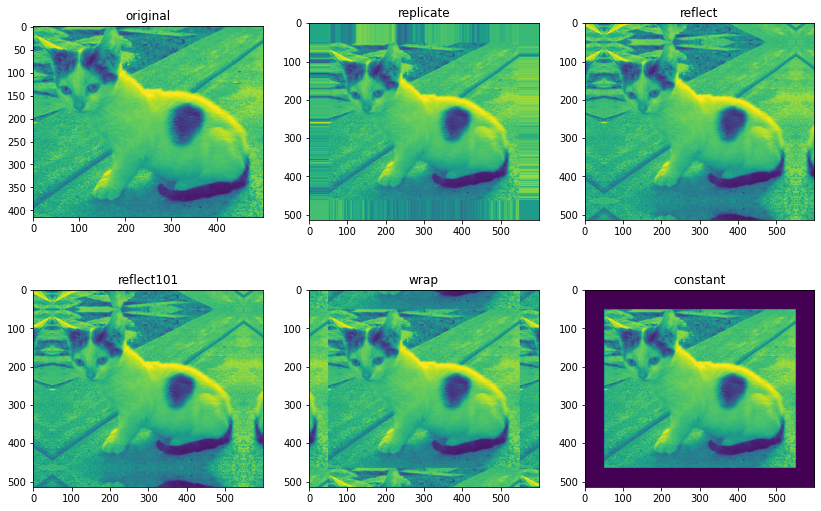

-1

In [60]:
import numpy as np
import cv2

img=cv2.imread('./image/cat.jpg', 0)
top_size = bottom_size = left_size = right_size = 50

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)

plt.figure(figsize=(14, 9))
plt.subplot(231), plt.imshow(img), plt.title('original');
plt.subplot(232), plt.imshow(replicate), plt.title('replicate')
plt.subplot(233), plt.imshow(reflect), plt.title('reflect')
plt.subplot(234), plt.imshow(reflect101), plt.title('reflect101')
plt.subplot(235), plt.imshow(wrap), plt.title('wrap')
plt.subplot(236), plt.imshow(constant), plt.title('constant'), plt.show()

cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.waitKey(1)

In [61]:
import cv2
import numpy as np

o=cv2.imread("./image/lenaNoise.png")
kernel = np.ones((5, 5), np.float32)/25   # how about /10

r = cv2.filter2D(o, -1, kernel)  # -1 是影像深度 -1 表示與原圖相同, anchor:以中心為準, delta:offset
# r = cv2.blur(o,(5,5))  
cv2.imshow("original",o)
cv2.imshow("fliter2D",r) 
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### sharpen image

In [63]:
import numpy as np
import argparse
import cv2

img = cv2.imread('.\image\mybaby.jpg')
cv2.imshow('Original', img)

# generating the kernels
kernel_sharp1 = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

kernel_sharp2 = np.array([[-1,-1,-1],
                          [-1,9,-1],
                          [-1,-1,-1]])

kernel_sharp3 = np.array([[1,1,1],
                          [1,-7,1],
                          [1,1,1]])

kernel_sharp4 = np.array([[-1,-1,-1,-1,-1],
                          [-1,2,2,2,-1],
                          [-1,2,8,2,-1],
                          [-1,2,2,2,-1],
                          [-1,-1,-1,-1,-1]]) / 8.0

# applying different kernels to the input image
out1 = cv2.filter2D(img, -1, kernel_sharp1)
out2 = cv2.filter2D(img, -1, kernel_sharp2)
out3 = cv2.filter2D(img, -1, kernel_sharp3)
out4 = cv2.filter2D(img, -1, kernel_sharp4)

cv2.imshow('1. Sharpening', out1)
cv2.imshow('2. More Sharpening', out2)
cv2.imshow('3. Excessive Sharpening', out3)
cv2.imshow('4. Edge Enhancement', out4)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Gaussian Filter
> 它的運作方式與 Averaging Filter 類似，但差別在於中間那個點的計算方式不同，Gaussian Filter 的作法是將給予各點不同的權值，``愈靠近中央點的權值愈高``，最後再以平均方式計算出中央點，因此，Gaussia Filter 的模糊化效果比起 Averaging 會比較明顯，但是效果卻更為自然。

><img src=".\image\filter_Gauss.jpg"  style='height:250px; width:700px'></img>

> $GaussianBlur(src, ksize, sigmaX, sigmaY=None, borderType=None)$

>> $SigmaX = 0.3 * [(ksize.width - 1) * 0.5 -1] + 0.8$
>> $SigmaY = 0.3 * [(ksize.width - 1) * 0.5 -1] + 0.8$<br>

>> $SigmaY$ : 垂直方向的標準差預設為 0 表示與水平方向相同<br>
>> ``高斯分佈(也叫常態分佈)`` 的特點為 ,標準差越大, 分佈越分散, 標準差越小, 分佈越集中.

><img src=".\image\Gauss.jpg"  style='height:300px; width:500px'></img>

> Gaussian kernel of size = 3
>> $ Gx = \frac{1}{16}\begin{pmatrix}1&2&1\\2&4&2\\1&2&1\end{pmatrix}$

> Gaussian kernel of size = 5
>> $ Gx = \frac{1}{159}\begin{pmatrix}2&4&5&4&2\\4&9&12&9&4\\5&12&15&12&5\\4&9&12&9&4\\2&4&5&4&2\end{pmatrix}$

### sigma diff.

In [71]:
import cv2
o = cv2.imread("image/lenaNoise.png")
sigma0 = cv2.GaussianBlur(o, (5,5), 0, 0)   #(5, 5)是高斯矩陣的長與寬，標準差取 0 時 OpenCV 會根據高斯矩陣的尺寸自己計算
sigma10 = cv2.GaussianBlur(o, (5,5), 10, 0) #(5, 5)是高斯矩陣的長與寬 ，標準差取 10 時 OpenCV 會根據高斯矩陣的尺寸自己計算

cv2.imshow("original", o)
cv2.imshow("sigma0", sigma0)
cv2.imshow("sigma10", sigma10)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### GaussianBlur kernal diff.

In [72]:
import numpy as np
import cv2

image = cv2.imread('./image/mybaby.jpg')
cv2.imshow("Original", image)

image=cv2.resize(image,(500, 280))

# stack output images together
blurred = np.hstack([
    cv2.GaussianBlur(image, (3, 3), 0),   # kernal size 越大, sigma 愈大, 圖像愈模糊 
    cv2.GaussianBlur(image, (5, 5), 0),
    cv2.GaussianBlur(image, (7, 7), 0)])

cv2.imshow("Gaussian 3*3, 5*5, 7*7", blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Median Filter 中位數
> 計算內核窗口下所有像素的中位數，並將中心像素替換為該中位數而``不是平均值``<br>
><img src=".\image\filter_median.png"  style='height:250px; width:500px'></img>

> Average vs. Median<br>
><img src=".\image\AvgMedian.png"  style='height:200px; width:500px'></img>

### blur vs. medianBlur

In [73]:
import cv2
o=cv2.imread("image/lenaNoise.png")

blur=cv2.blur(o, (3,3))
med_blur=cv2.medianBlur(o, 3)

cv2.imshow("original", o)
cv2.imshow("blur", blur)
cv2.imshow("median_blur", med_blur)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### medianBlur : diff size

In [74]:
import numpy as np
import cv2

image = cv2.imread('./image/mybaby.jpg')

cv2.imshow("Original", image)
image=cv2.resize(image,(500, 280))

# stack output images together
blurred = np.hstack([
    cv2.medianBlur(image, 3),
    cv2.medianBlur(image, 5),
    cv2.medianBlur(image, 7)])

cv2.imshow("MedianBlue 3, 5, 7", blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Bilateral Filter 雙邊濾波器<br>
>雙邊濾波能在保持邊界清晰的情況下有效的去除噪音。但是這種操作與其他濾波器相比會``比較慢``, 我們知道高斯濾波器是求中心點鄰近區域畫素的高斯加權平均值。這種``高斯濾波器只考慮畫素之間的空間關係``，而``不會考慮畫素值之間的關係``（畫素的相似度）。所以這種方法不會考慮一個畫素是否位於邊界。因此邊界也會被模糊掉。

>雙邊濾波在同時使用``空間高斯權重``和``灰度值相似性高斯權重``。空間高斯函式確保只有鄰近區域的畫素對中心點有影響，灰度值相似性高斯函式確保只有``與中心畫素灰度值相近的才會被用來做模糊運算``。所以這種方法會確保邊界不會被模糊掉，因為邊界處的灰度值變化比較大.

>簡單說就是, 在生成周邊畫素的權重矩陣時,``如果發現旁邊的畫素值和當前的畫素值差異很大, 就只給差異很大的那個元素分配很小的權重,這樣"大的突變差異就被保留了"``.<br>

><img src=".\image\bilater.png"  style='height:450px; width:700px'></img>
---
>此種方法的好處是，它不但擁有 Median filter 的除噪效果，又能保留圖片中的不同物件的邊緣 (其它三種方式均會造成邊緣同時被模糊化）, 但缺點是，Bilateral Filter執行的效率較差，運算需要的時間較長。

> cv2.bilateralFilter( src, d, σ_Color, σ_Space[, dst[, borderType]]) 
> * src ：影像矩陣
> * d ：鄰域直徑
> * sigmaColor ：顏色標準差，愈大代表在計算時需要考慮更多的顏色
> * sigmaSpace ：空間標準差, 這個參數與Gaussian filter使用的相同，數值越大，代表越遠的像素有較大的權值。

In [75]:
import cv2
o=cv2.imread("image/lenaNoise.png")
r1=cv2.bilateralFilter(o, 5, 100, 100)
r2=cv2.bilateralFilter(o, 5, 200, 200)

cv2.imshow("original", o)
cv2.imshow("bf:5_100*100", r1)
cv2.imshow("bf:5_200*200", r2)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 以上可看出 bilateralFilter 對雜訊處裡效果不好, 對邊界處理較佳
GaussianBlur vs. BilaterFilter

In [76]:
import cv2
o=cv2.imread("image/bilTest.bmp")

g=r=cv2.GaussianBlur(o, (55, 55), 0, 0)
b=cv2.bilateralFilter(o, 55, 100, 100)

cv2.imshow("original",o)
cv2.imshow("Gaussian",g)
cv2.imshow("bilateral",b)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### bilateralFilter : diff parameters

In [ ]:
import numpy as np
import cv2

image = cv2.imread('./image/mybaby.jpg')
cv2.imshow("Original", image)

image=cv2.resize(image,(500, 280))

# stack output images together
blurred = np.hstack([
    cv2.bilateralFilter(image, 5, 20, 20),
    cv2.bilateralFilter(image, 7, 40, 40),
    cv2.bilateralFilter(image, 9, 60, 60)])

cv2.imshow("Bilateral", blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

---

# Module 6. 設定值處理

## 6-1: 什麼是 Threshold 二值化處理
### Thresh 門檻, 閾
> threshold 是門檻值的意思，OpenCV 提供的 threshold 工具包裡面有影像門檻值的功能，當畫素值高於門檻值時，我們給這個畫素賦予一個新值（可能是白色），否則我們給它賦予另一種顏色（也許是黑色）。這個函式就是 cv2.threshold()

> 圖像的二值化就是將圖像上的圖元點的灰度值設置為 0 或 255，這樣將使整個圖像呈現出明顯的黑白效果。在數位影像處理中，二值圖像佔有非常重要的地位，圖像的二值化使圖像中資料量大為減少，從而能凸顯出目標的輪廓。

> $ret, dst = cv2.threshold(src, thresh, maxval, type)$
> * ret = thresh
> * dst : 輸出圖 
> * src : 輸入圖，只能輸入單通道影像，通常來說為灰度圖
> * thresh ：閾, 門檻值
> * maxval ：當畫素值超過了門檻值（或者小於門檻值，根據type來決定），所賦予的值
> * type :

|語法 type        |值 |說明                                                         |
|-----------------|--|-------------------------------------------------------------|
|THRESH_BINARY    |0 |即二值化，將大於門檻值的灰度值設為最大灰度值，小於門檻值的值設為0  |
|THRESH_BINARY_INV|1 |將大於門檻值的灰度值設為0，其他值設為最大灰度值                  |
|THRESH_TRUNC     |2 |將大於門檻值的灰度值設為門檻值，小於門檻值的值保持不變。(灰黑)    |
|THRESH_TOZERO    |3 |將小於門檻值的灰度值設為0，大於門檻值的值保持不變。(黑灰白對比)   |
|THRESH_TOZERO_INV|4 |將大於門檻值的灰度值設為0，小於門檻值的值保持不變。(黑灰強烈)     |

<img src=".\image\thresh1.png"  style='height:350px; width:800px'>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=np.random.randint(100, 150, size=[5, 5], dtype=np.uint8)

print(f'img : \n{img}\n')

t1, thd = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)   # try 125
print(f'thd :\n{thd}')

In [ ]:
import cv2
import numpy as np

img = cv2.resize(cv2.imread('./image/thresh.jpg',0),(300,200))
# img = cv2.resize(cv2.imread('./image/lenaGray.bmp', 0),(300, 300))

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # 1=255, 0=0
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)   # 1=127 Thresh, 0=value
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)  # 1=value,  0=0
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
print(f'ret : {ret}')

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1),  plt.imshow(images[i], 'gray')
    plt.setp(plt.title(titles[i]), color='w')
    plt.xticks([]), plt.yticks([])
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

## 6-2: 自我調節設定
### threshold adaptive ``局部`` 自我調節設定
> 自我調整閾值二值化函數根據圖片一小塊區域的值來計算對應區域的門檻, 閾值，從而得到也許更為合適的圖片。
> * thresh_type ： 閾值的計算方法，包含以下2種類型：
>> * cv2.ADAPTIVE_THRESH_MEAN_C : 鄰域面積的平均值
>> * cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 高斯窗口的鄰域值的加權和
> * Block Size ： 圖片中分塊的大小
> * C ：閾值計算方法中的常數項src−類的對像表示源（輸入）圖像。offset ( thresh - c )

In [ ]:
import cv2
import numpy as np

img=np.random.randint(0, 255, size=[5, 5], dtype=np.uint8)

print(f'img : \n{img}\n')

t1, thd = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)   # try 127 → 125
print(f'threshHold : {t1}\nthd :\n{thd}\n')

Ad_thd_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 3)
print(f'Ad_thd_mean :\n{Ad_thd_mean}\n')

Ad_thd_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 3)
print(f'Ad_thd_gauss :\n{Ad_thd_mean}')

In [ ]:
import numpy as np
import cv2

image = cv2.imread('.\image\mybaby.jpg', 0)
cv2.imshow('Original', image)

ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)  # 1 : 255, 0 : 0
cv2.imshow('Thresh hold 127, 255', thresh)

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 3)
cv2.imshow('adaptive / Mean Thresh', thresh)

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 3)
cv2.imshow('adaptive /  Gaussian Thresh', thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

## 6-3: otsu 處理
> #### Otsu演算法假設這副圖片由前景色和背景色組成，通過統計學方法（最大類間方差）選取一個閾值，將前景和背景盡可能分開。也就是說這還是一個全域閾值問題。
> ### threshold otsu : 是一種自動門檻值決定法則
><img src=".\image\otsu.png"  style='height:250px; width:520px'>

### Otsu 過程 ：
> * 計算圖像長條圖
> * 設定一閾值，把長條圖強度大於閾值的圖元分成一組，把小於閾值的圖元分成另外一組
> * 分別計算兩組內的偏移數，``並把偏移數相加``
> * 把 0 ~ 255 依照順序多為閾值，重複 1-3 的步驟，``直到得到最小偏移數``，其所對應的值即為結果閾值。

> https://www.twblogs.net/a/5c9b5c2dbd9eee73ef4b088d

In [ ]:
import cv2
import numpy as np

img=np.random.randint(0, 255, size=[5, 5], dtype=np.uint8)
print(f'img : \n{img}\n')

th2, img2 = cv2.threshold(img, 0, 255,  cv2.THRESH_OTSU)  # type
print(f'THRESH_OTSU th2 :{th2}\n\nimg2 :\n{img2}')

In [ ]:
# using cv2 module
import numpy as np
from matplotlib import pyplot as plt
import cv2

image = cv2.imread('.\image\mybaby.jpg', 0)
# image = cv2.imread('.\image\lenaColor.png')

cv2.imshow('original', image)

ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)  # 1 : 255, 0 : 0
cv2.imshow('Thresh hold : 127', thresh)

# Otsu threshold
th2, img2 = cv2.threshold(image, 0, 255,  cv2.THRESH_OTSU)
print(f"Otsu's threshold : {th2}")
cv2.imshow(f'Otsu : {th2}', img2)
plt.hist(image.ravel(), 256)   # 畫直方圖
plt.axvline(x=th2, color='r', lw=1)
# print(plt.ylim()[1])
plt.text(th2+5, plt.ylim()[1]*.8, f'Otsu : {th2}', fontsize=10, color='r')

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

## threshold simple ??

In [ ]:
import numpy as np
import cv2

image = cv2.imread('.\image\mybaby.jpg', 0)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow("Original", image)

T, thresh = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thresh)

T, threshInv = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Threshold Binary Inv.", threshInv)

cv2.imshow("bitwise_and", cv2.bitwise_and(image, image, mask=threshInv))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

# --- the end ---